### Imports

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
from glob import glob
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
model_dir = 'sample_code_submission/' # Change the model to a better one once you have one!
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
%reload_ext autoreload

In [4]:
data_name = 'flower_data' # DO NOT CHANGE
data_dir = 'sample_data'
data_dir = 'public_data' # Comment to use sample_data (You must download the public_data on CodaLab)
# !ls $data_dir*

In [96]:
def visualize_scatter(data_2d, label_ids, figsize=(20,20)):
    plt.figure(figsize=figsize)
    plt.grid()
    
    nb_classes = len(np.unique(label_ids))
    
    for label_id in np.unique(label_ids):
        plt.scatter(data_2d[np.where(label_ids == label_id), 0],
                    data_2d[np.where(label_ids == label_id), 1],
                    label=id_to_label_dict[label_id]
                    )
    plt.legend(loc='best',ncol=3)

### Load Data

In [6]:
from data_io import read_data
data, meta_data = read_data(data_dir)

###-------------------------------------###
### Checking Data
###-------------------------------------###


-------------------------------------
[+] Your dataset is in perfect format
-------------------------------------


###-------------------------------------###
### Loading Data
###-------------------------------------###


-------------------------------------
[+] Data loaded successfully
-------------------------------------


###-------------------------------------###
### Loading Images
###-------------------------------------###


-------------------------------------
[+] Images loaded successfully
-------------------------------------




### Data Statistics

In [7]:
print("Categories/Classes : ", data['categories'])
print("Number of images : ", data['images'].sum())
print("Train Images:", len(data['train_images']))
print("Test Images:", len(data['train_images']))

Categories/Classes :  ['Alpine Sea Holly' 'Anthurium' 'Artichoke' 'Azalea' 'Ball Moss'
 'Balloon Flower' 'Barbeton Daisy' 'Bearded Iris' 'Bee Balm'
 'Bird of Paradise' 'Bishop of Llandaff' 'Black-Eeyed Susan'
 'Blackberry Lily' 'Blanket Flower' 'Bolero Deep Blue' 'Bougainvillea'
 'Bromelia' 'Buttercup' 'Californian Poppy' 'Camellia' 'Canna Lily'
 'Canterbury Bells' 'Cape Flower' 'Carnation' 'Cautleya Spicata'
 'Clematis ' "Colt's Foot" 'Columbine' 'Common Dandelion' 'Corn Poppy'
 'Cyclamen' 'Daffodil' 'Desert-Rose' 'English Marigold' 'Fire Lily'
 'Foxglove' 'Frangipani' 'Fritillary' 'Garden Phlox' 'Gaura' 'Gazania'
 'Geranium' 'Giant White Arum Lily' 'Globe Thistle' 'Globe-Flower'
 'Grape Hyacinth' 'Great Masterwort' 'Hard-Leaved Pocket Orchid'
 'Hibiscus' 'Hippeastrum' 'Japanese Anemone' 'King Protea' 'Lenten Rose'
 'Lotus' 'Love in the Mist' 'Magnolia' 'Mallow' 'Marigold' 'Mexican Aster'
 'Mexican Petunia' 'Monkshood' 'Moon Orchid' 'Morning Glory'
 'Orange Dahlia' 'Osteospermum' 'Oxe

### Meta-Data

In [8]:
for key, value in meta_data.items():
    print(key, " : ", value)
    

dataset_name  :  flowers
dataset_description  :  flowers of 102 categories commonly occuring in the UK
total_categories  :  102
total_super_categorie  :  0
uniform_number_of_images_per_category  :  False
images_per_category  :  80
has_super_categories  :  False
image_column_name  :  FILE_NAME
category_column_name  :  CATEGORY
csv_with_tab  :  False


### Distribution of Classes/Labels

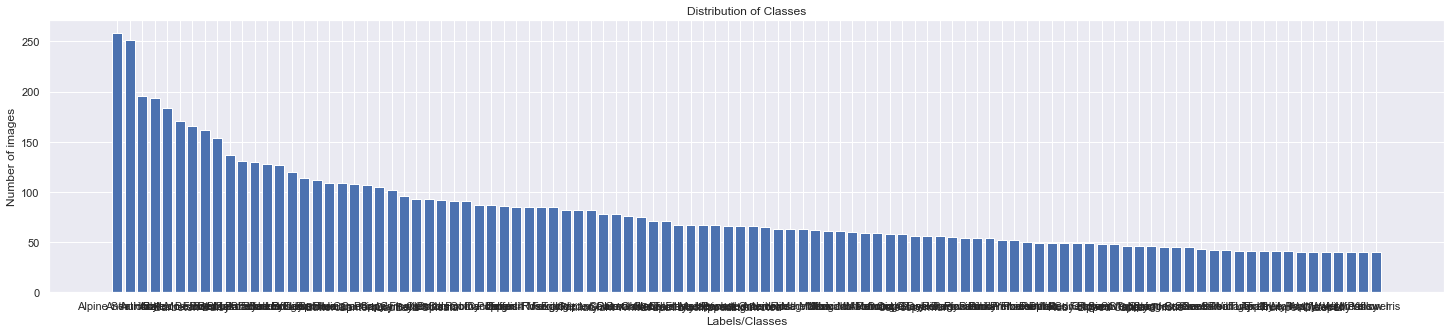

In [9]:
plt.figure(figsize=(25, 5))
plt.bar(data['categories'], data['images'])
plt.xlabel("Labels/Classes")
plt.ylabel("Number of images")
plt.title("Distribution of Classes");

### Visualization

In [10]:
data["train_labels"]

array(['Monkshood', 'Gazania', 'Tiger Lily', ..., 'Foxglove',
       'Watercress', 'Lotus'], dtype=object)

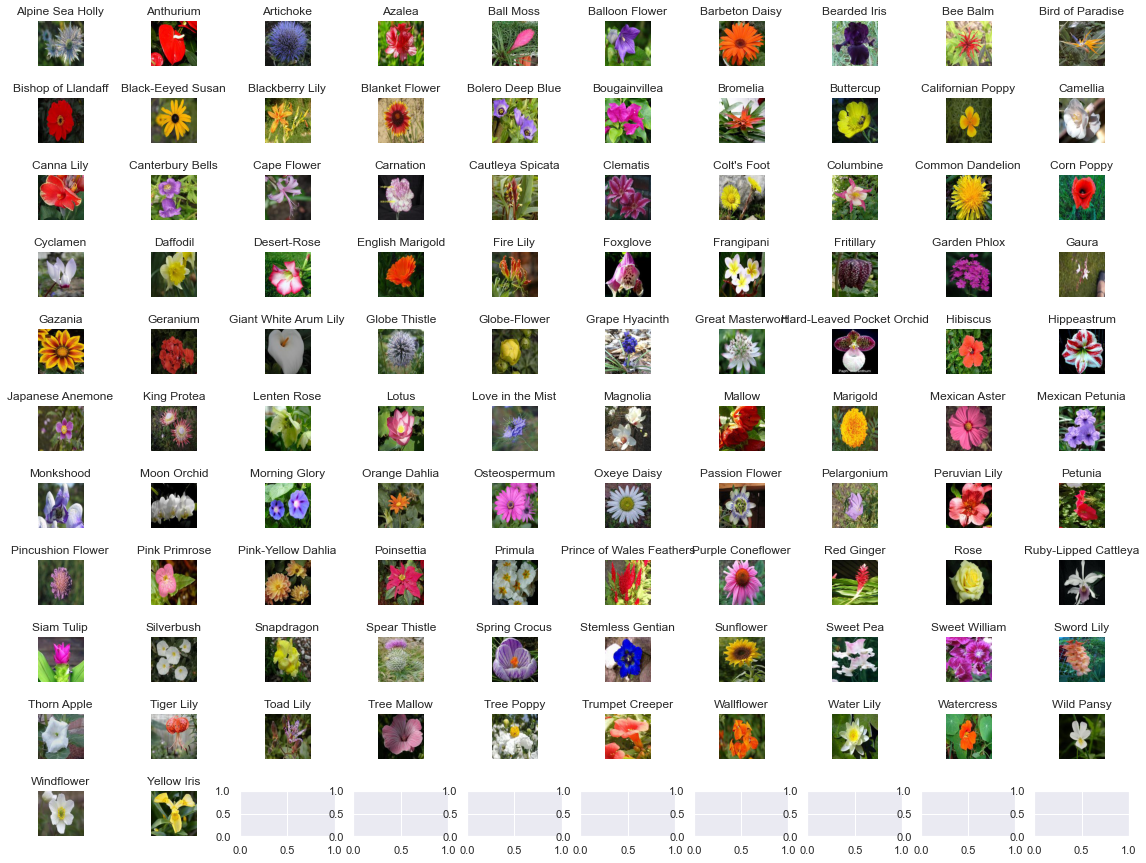

In [11]:
number_of_images_to_show = 102

images = data["train_images"]
labels = data["train_labels"]

fig, _axs = plt.subplots(nrows=11, ncols=10, figsize=(20,15))
fig.subplots_adjust(hspace=0.7)
axs = _axs.flatten()

df_labels = pd.Series(labels)

for i, cat in enumerate(data["categories"]):
    ind_cat = df_labels[df_labels == cat].index[0]
    img = images[ind_cat]
    label = labels[ind_cat]
    axs[i].set_title('{}'.format(label))
    axs[i].imshow(img)
    axs[i].set_axis_off()

plt.show()

In [85]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(data['categories']))}
label_ids = np.array([label_to_id_dict[x] for x in labels])
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
id_to_label_dict

{0: 'Alpine Sea Holly',
 1: 'Anthurium',
 2: 'Artichoke',
 3: 'Azalea',
 4: 'Ball Moss',
 5: 'Balloon Flower',
 6: 'Barbeton Daisy',
 7: 'Bearded Iris',
 8: 'Bee Balm',
 9: 'Bird of Paradise',
 10: 'Bishop of Llandaff',
 11: 'Black-Eeyed Susan',
 12: 'Blackberry Lily',
 13: 'Blanket Flower',
 14: 'Bolero Deep Blue',
 15: 'Bougainvillea',
 16: 'Bromelia',
 17: 'Buttercup',
 18: 'Californian Poppy',
 19: 'Camellia',
 20: 'Canna Lily',
 21: 'Canterbury Bells',
 22: 'Cape Flower',
 23: 'Carnation',
 24: 'Cautleya Spicata',
 25: 'Clematis ',
 26: "Colt's Foot",
 27: 'Columbine',
 28: 'Common Dandelion',
 29: 'Corn Poppy',
 30: 'Cyclamen',
 31: 'Daffodil',
 32: 'Desert-Rose',
 33: 'English Marigold',
 34: 'Fire Lily',
 35: 'Foxglove',
 36: 'Frangipani',
 37: 'Fritillary',
 38: 'Garden Phlox',
 39: 'Gaura',
 40: 'Gazania',
 41: 'Geranium',
 42: 'Giant White Arum Lily',
 43: 'Globe Thistle',
 44: 'Globe-Flower',
 45: 'Grape Hyacinth',
 46: 'Great Masterwort',
 47: 'Hard-Leaved Pocket Orchid',


***
# Step 2: PCA



In [12]:
from data_io import write
from model import model

In [13]:
X_TRAIN = data["train_images"]
Y_TRAIN = data["train_labels_num"]
X_TEST = data["test_images"]
Y_TEST = data["test_labels_num"]

In [22]:
X_TRAIN_v2=X_TRAIN.reshape(len(X_TRAIN),-1)
X_TEST_v2=X_TEST.reshape(len(X_TEST),-1)

In [82]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(X_TRAIN_v2)

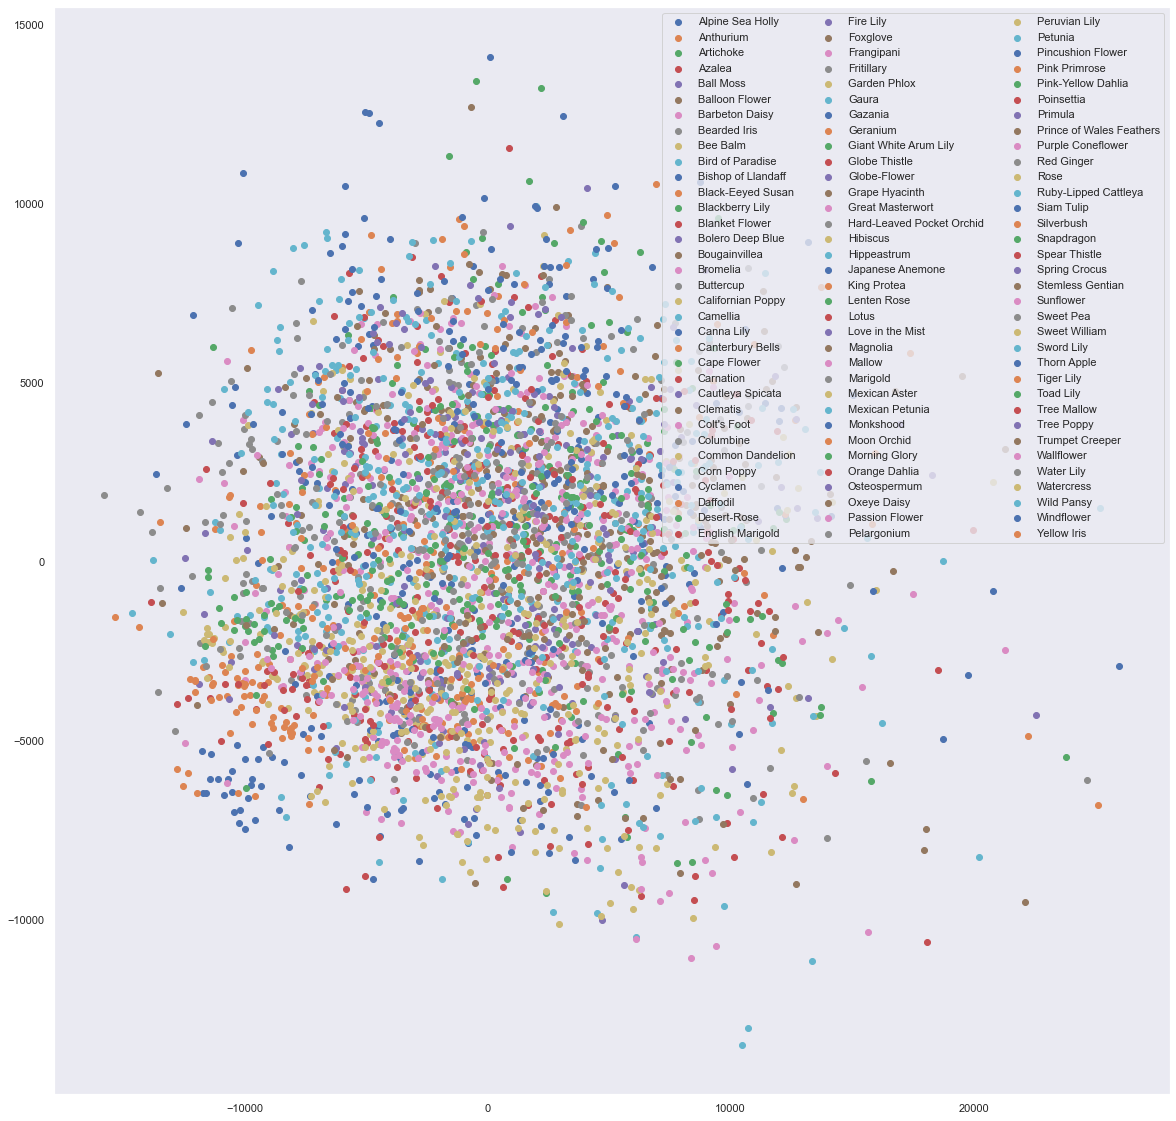

In [109]:
visualize_scatter(pca_result[:,[0,1]], label_ids)

In [83]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(pca_result)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

In [84]:
tsne_result_scaled.shape

(4094, 2)

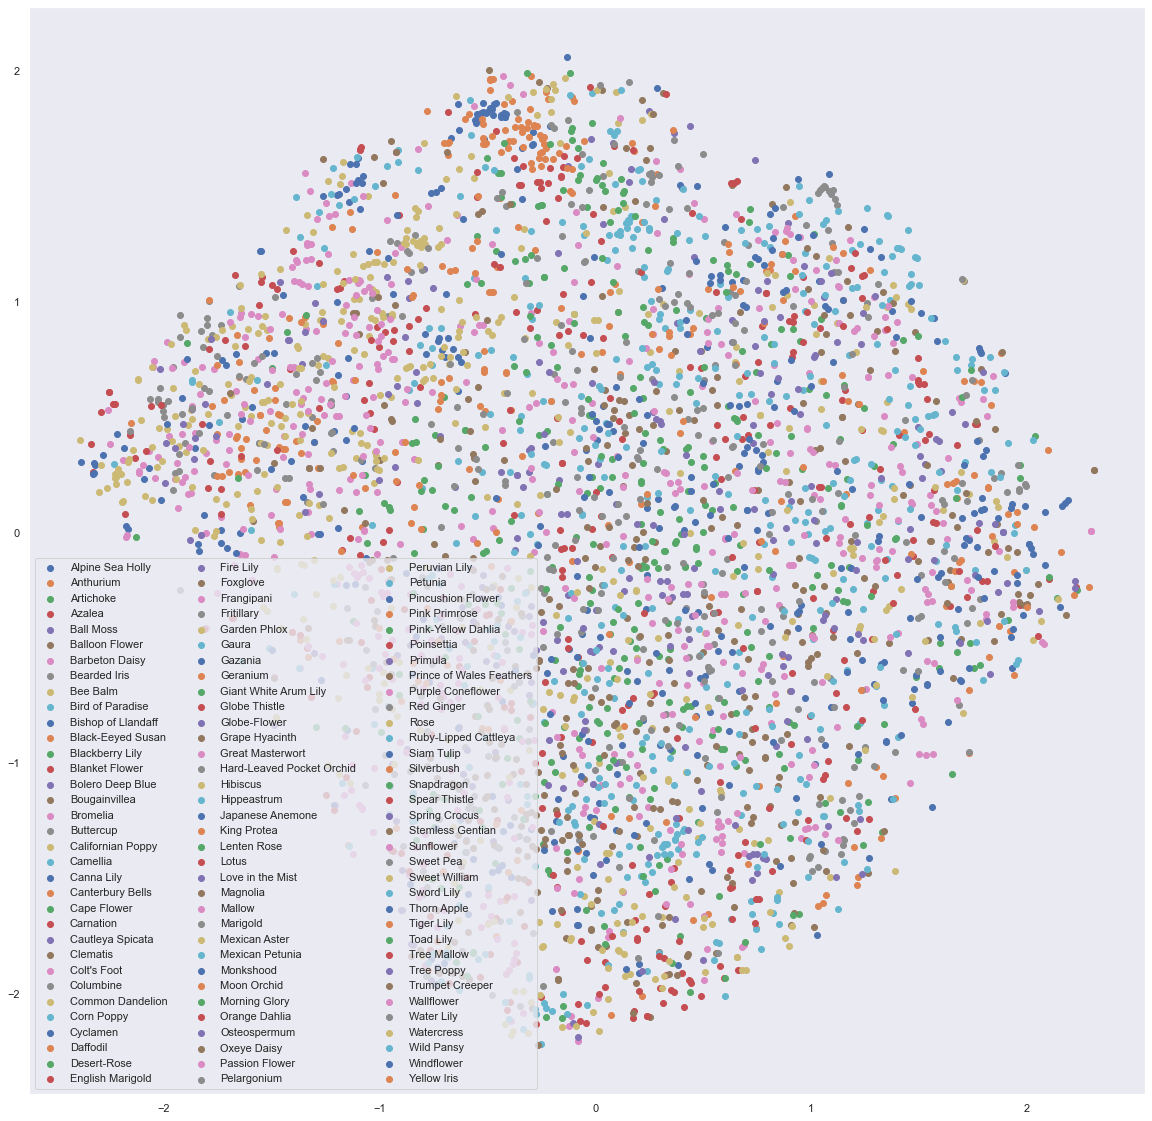

In [98]:
visualize_scatter(tsne_result_scaled, label_ids)

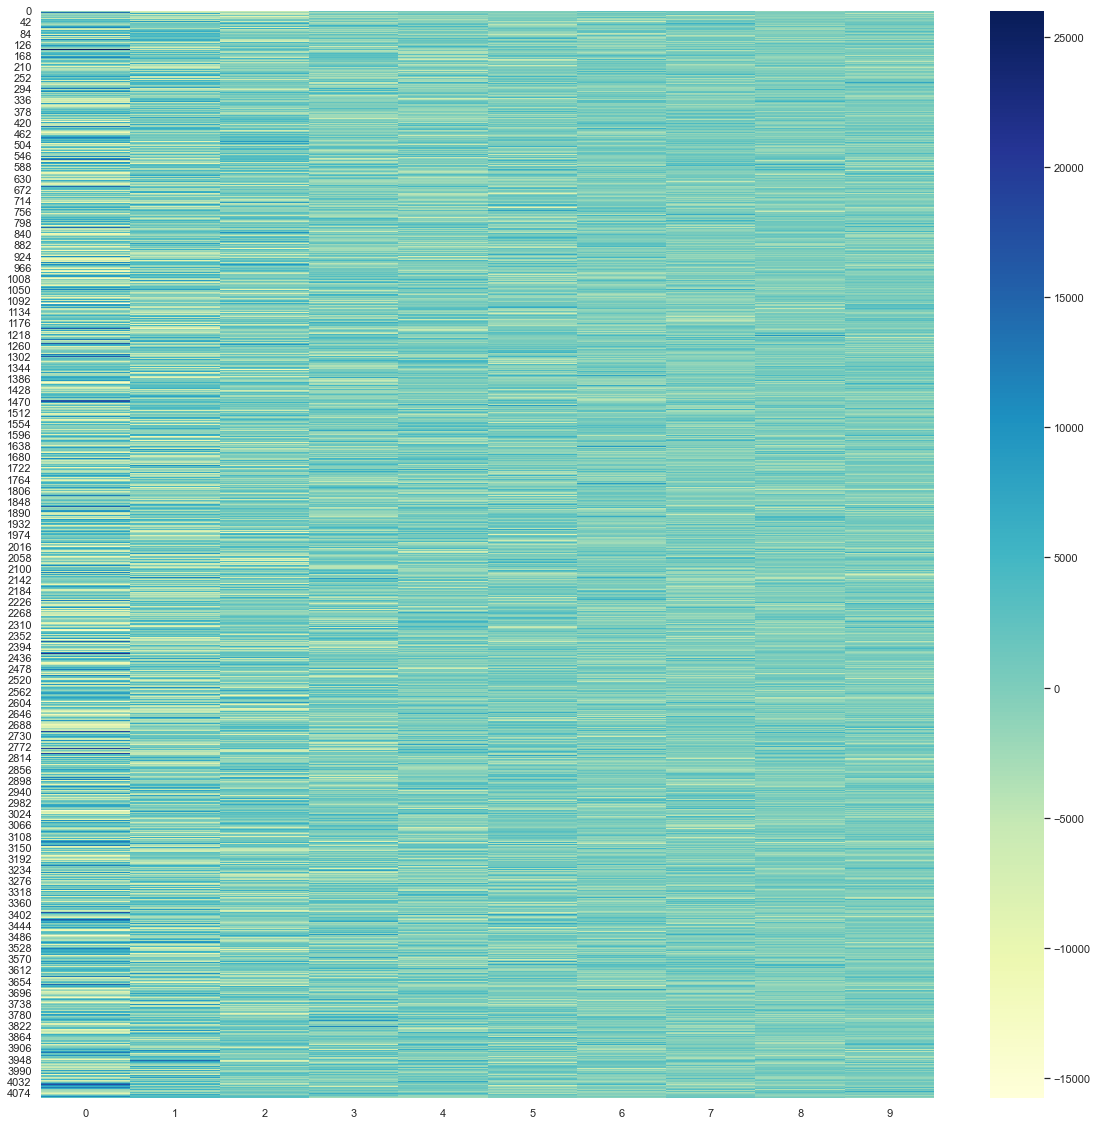

In [110]:
import seaborn as sns; sns.set_theme()
plt.figure(figsize=(20,20))
ax = sns.heatmap(pca_result[:,:10],cmap="YlGnBu")

C:\Users\elsal\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


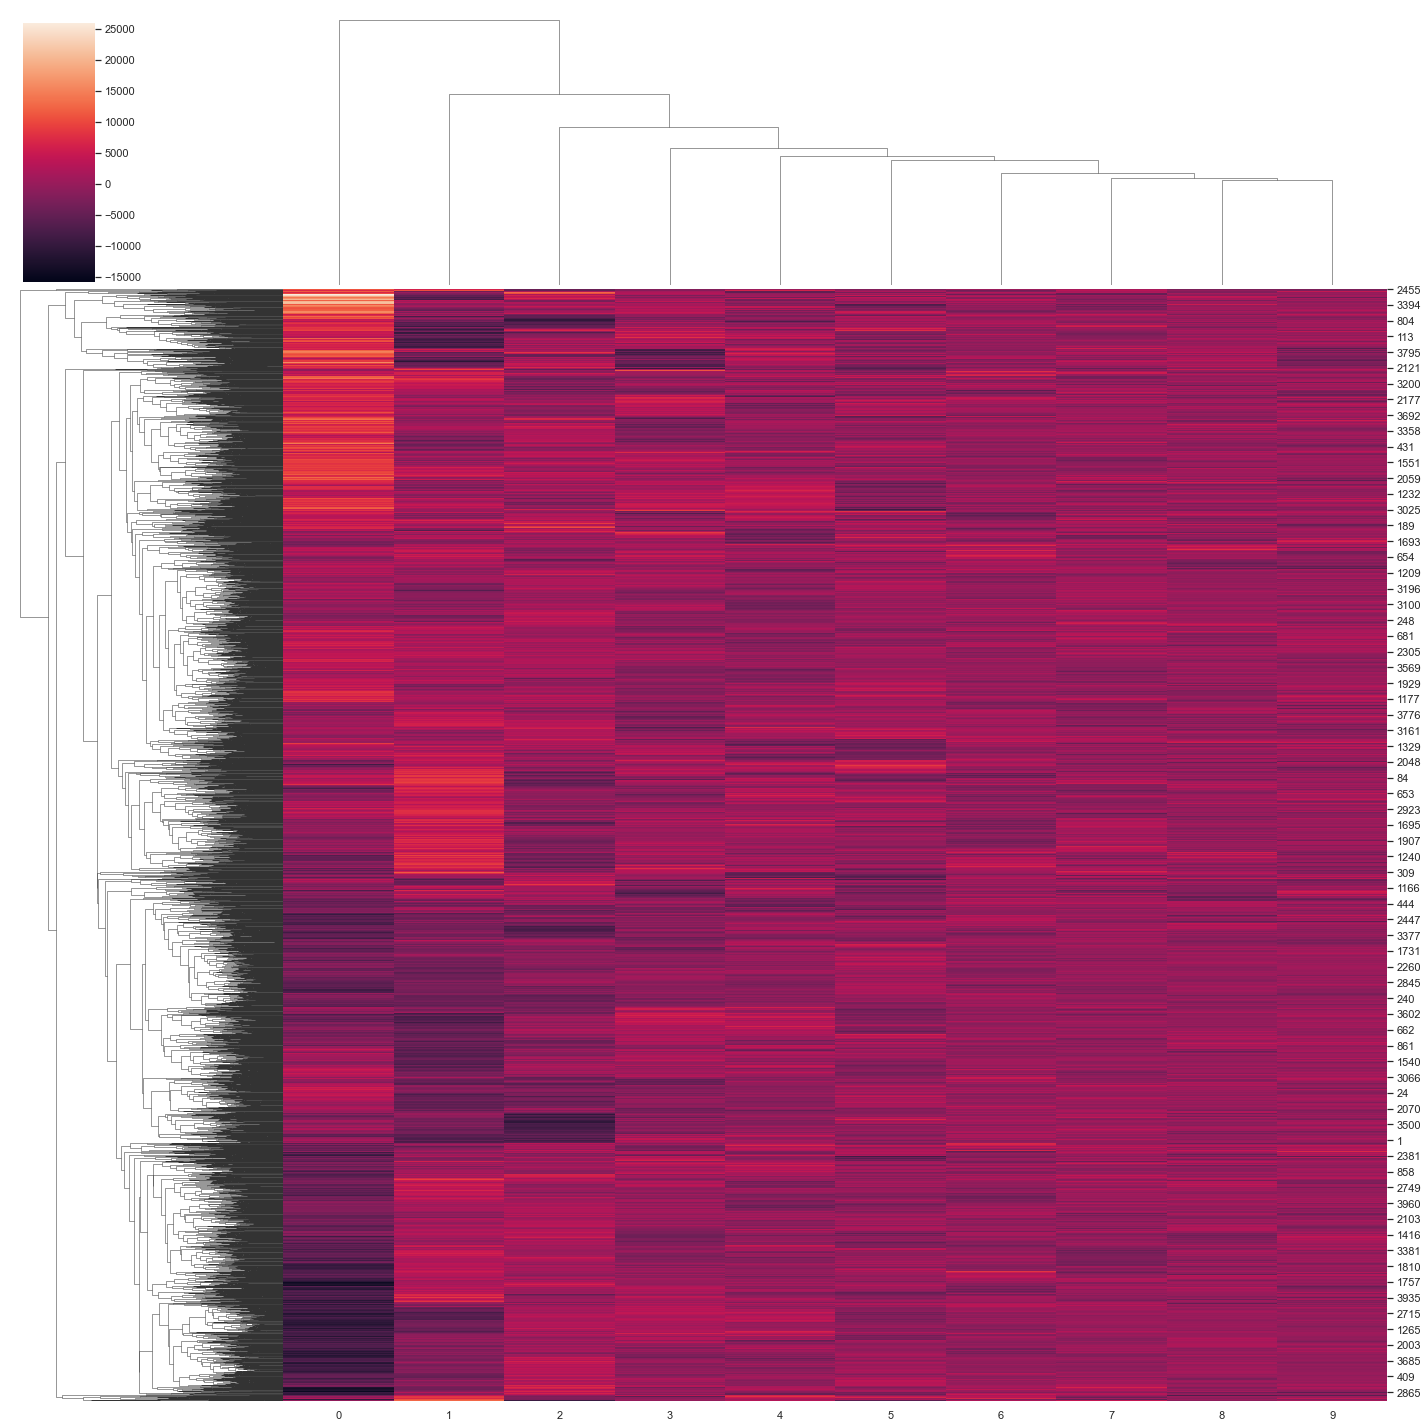

In [115]:
g = sns.clustermap(pca_result[:,:10],figsize=(20,20))

C:\Users\elsal\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


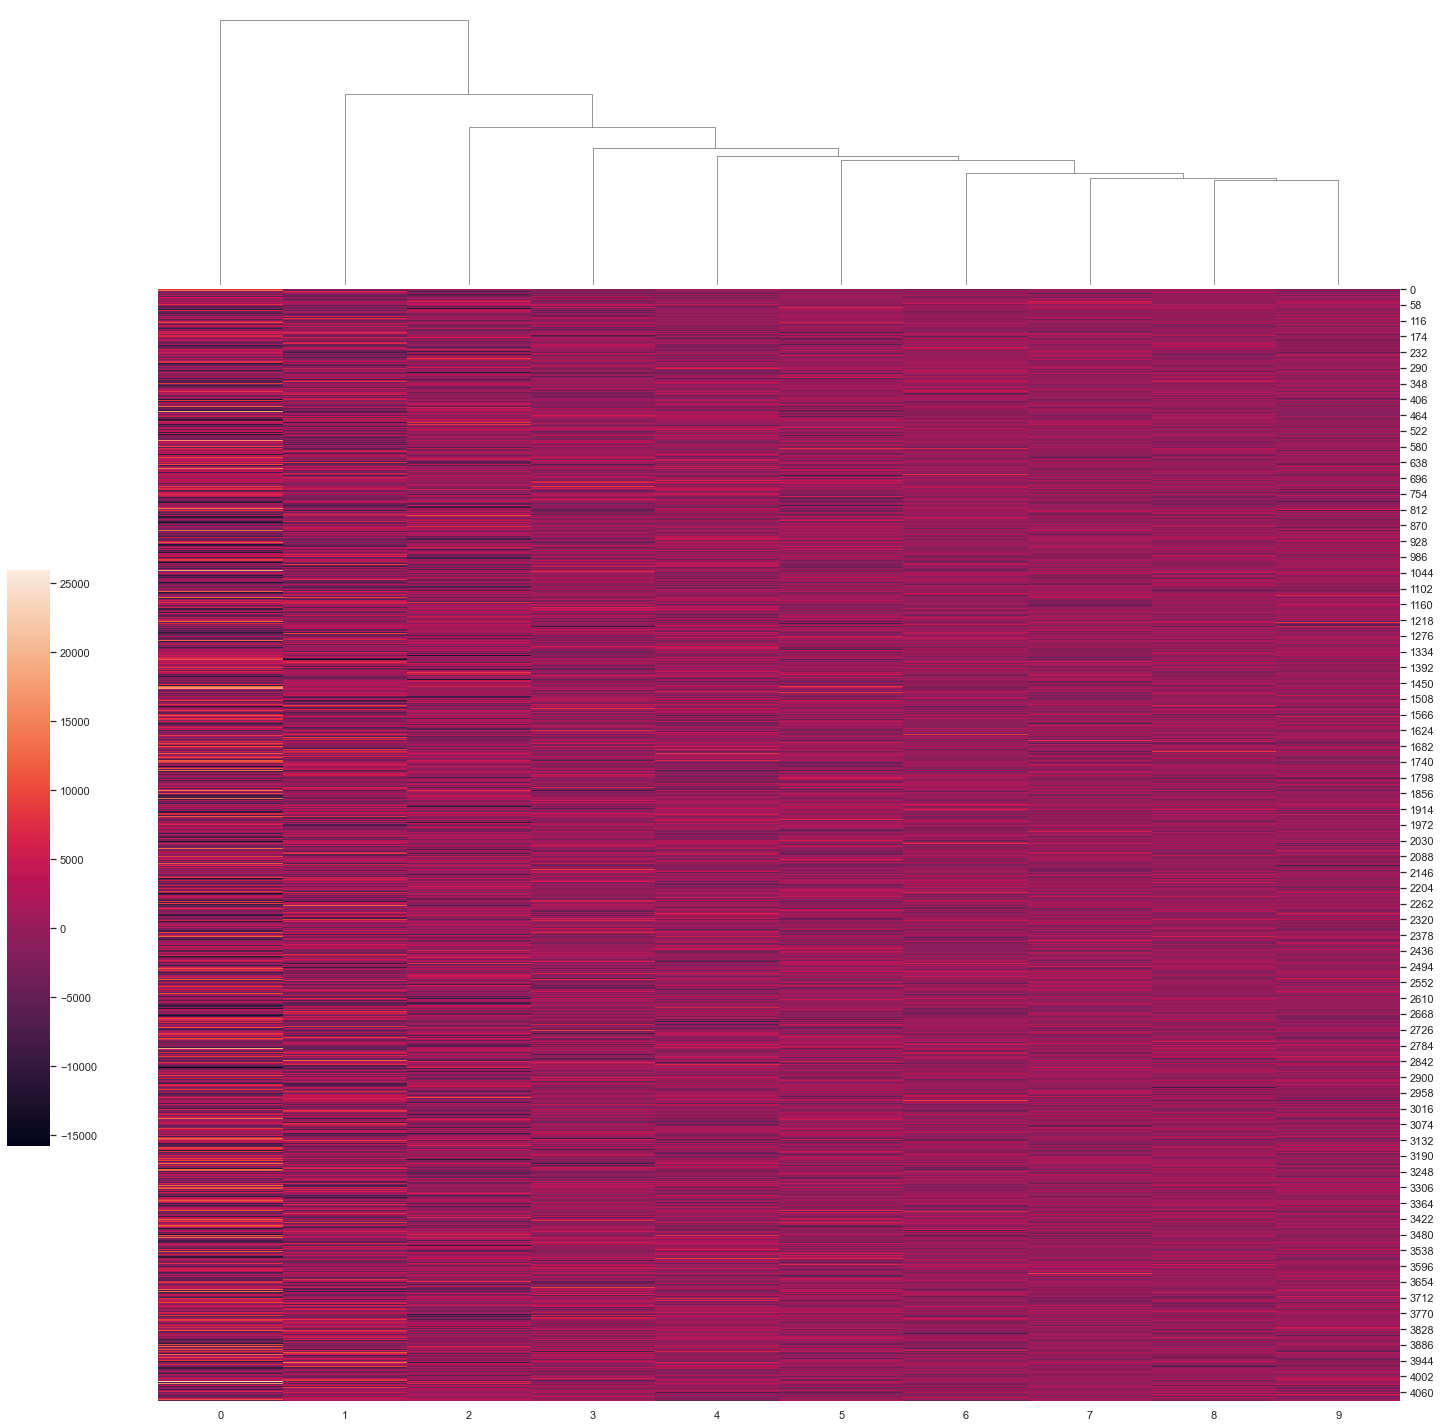

In [114]:
g = sns.clustermap(pca_result[:,:10],
                   figsize=(20, 20),
                   row_cluster=False,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(0, .2, .03, .4))

C:\Users\elsal\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


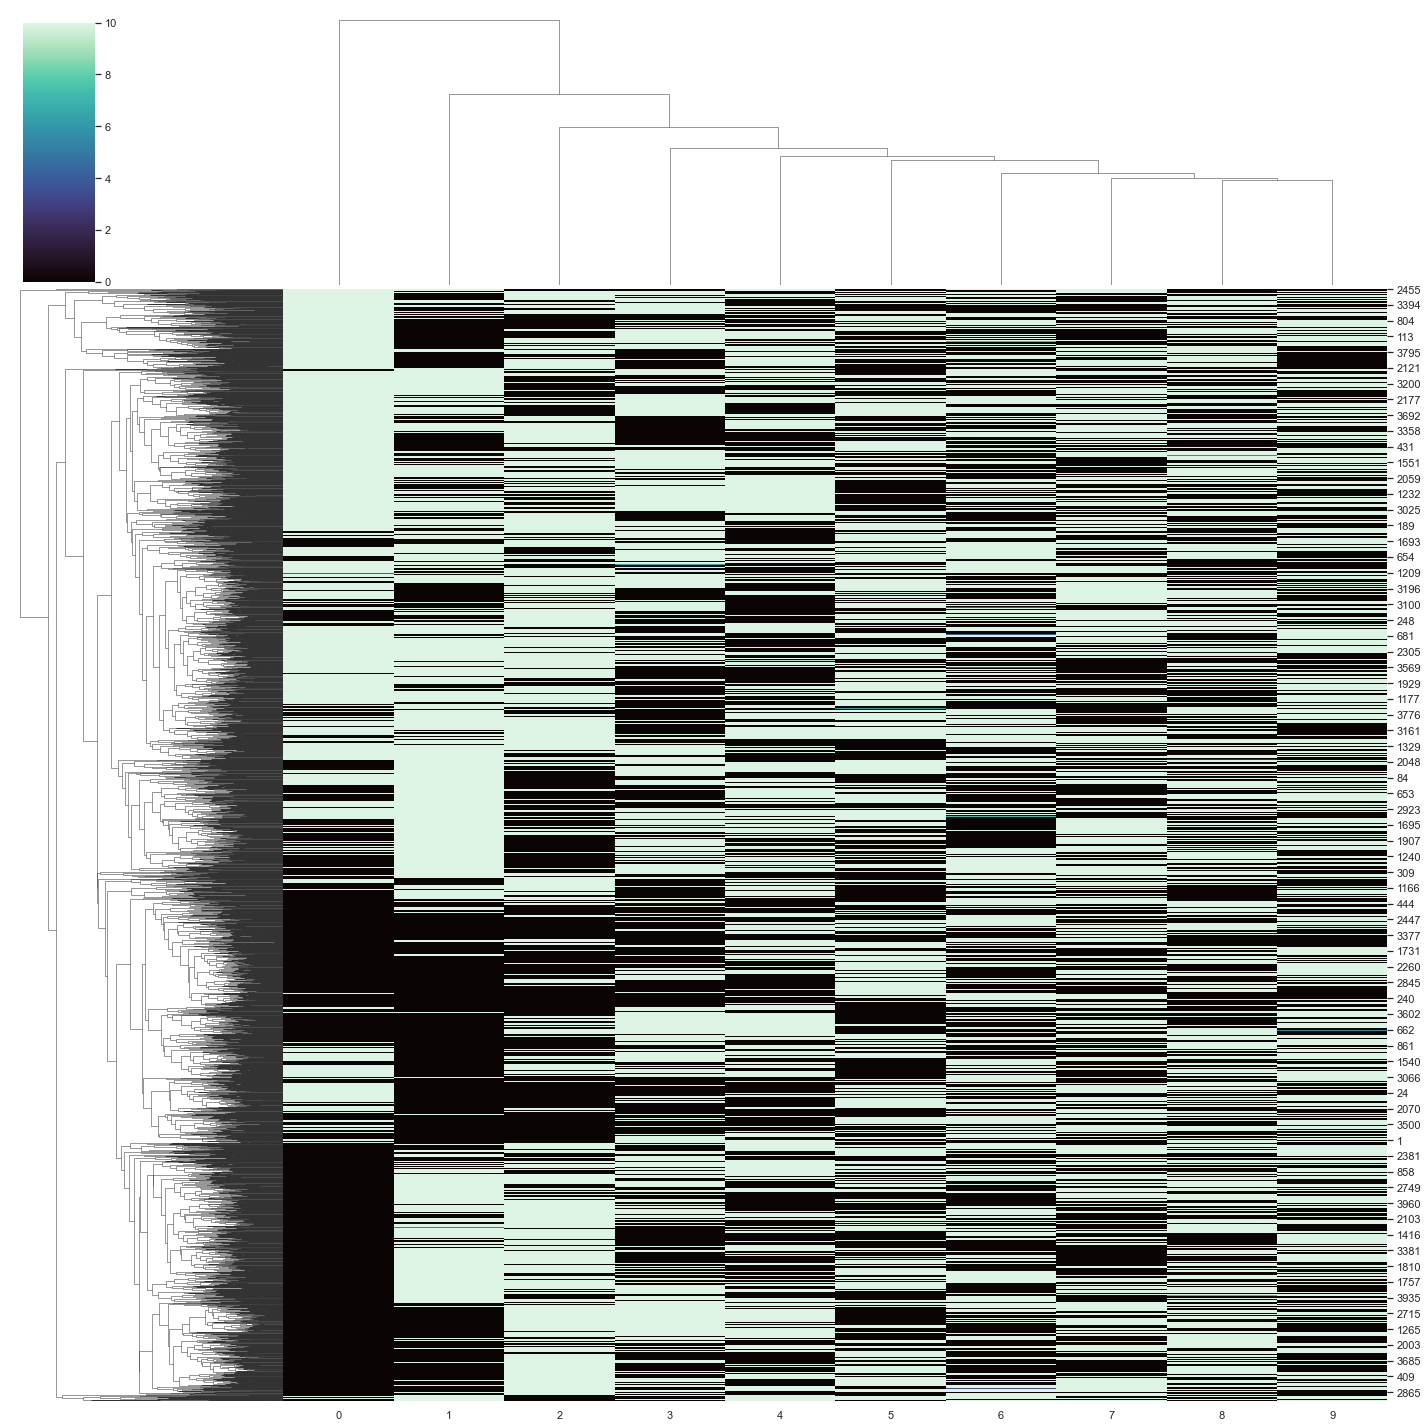

In [117]:
g = sns.clustermap(pca_result[:,:10], cmap="mako", vmin=0, vmax=10, figsize=(20, 20))

C:\Users\elsal\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


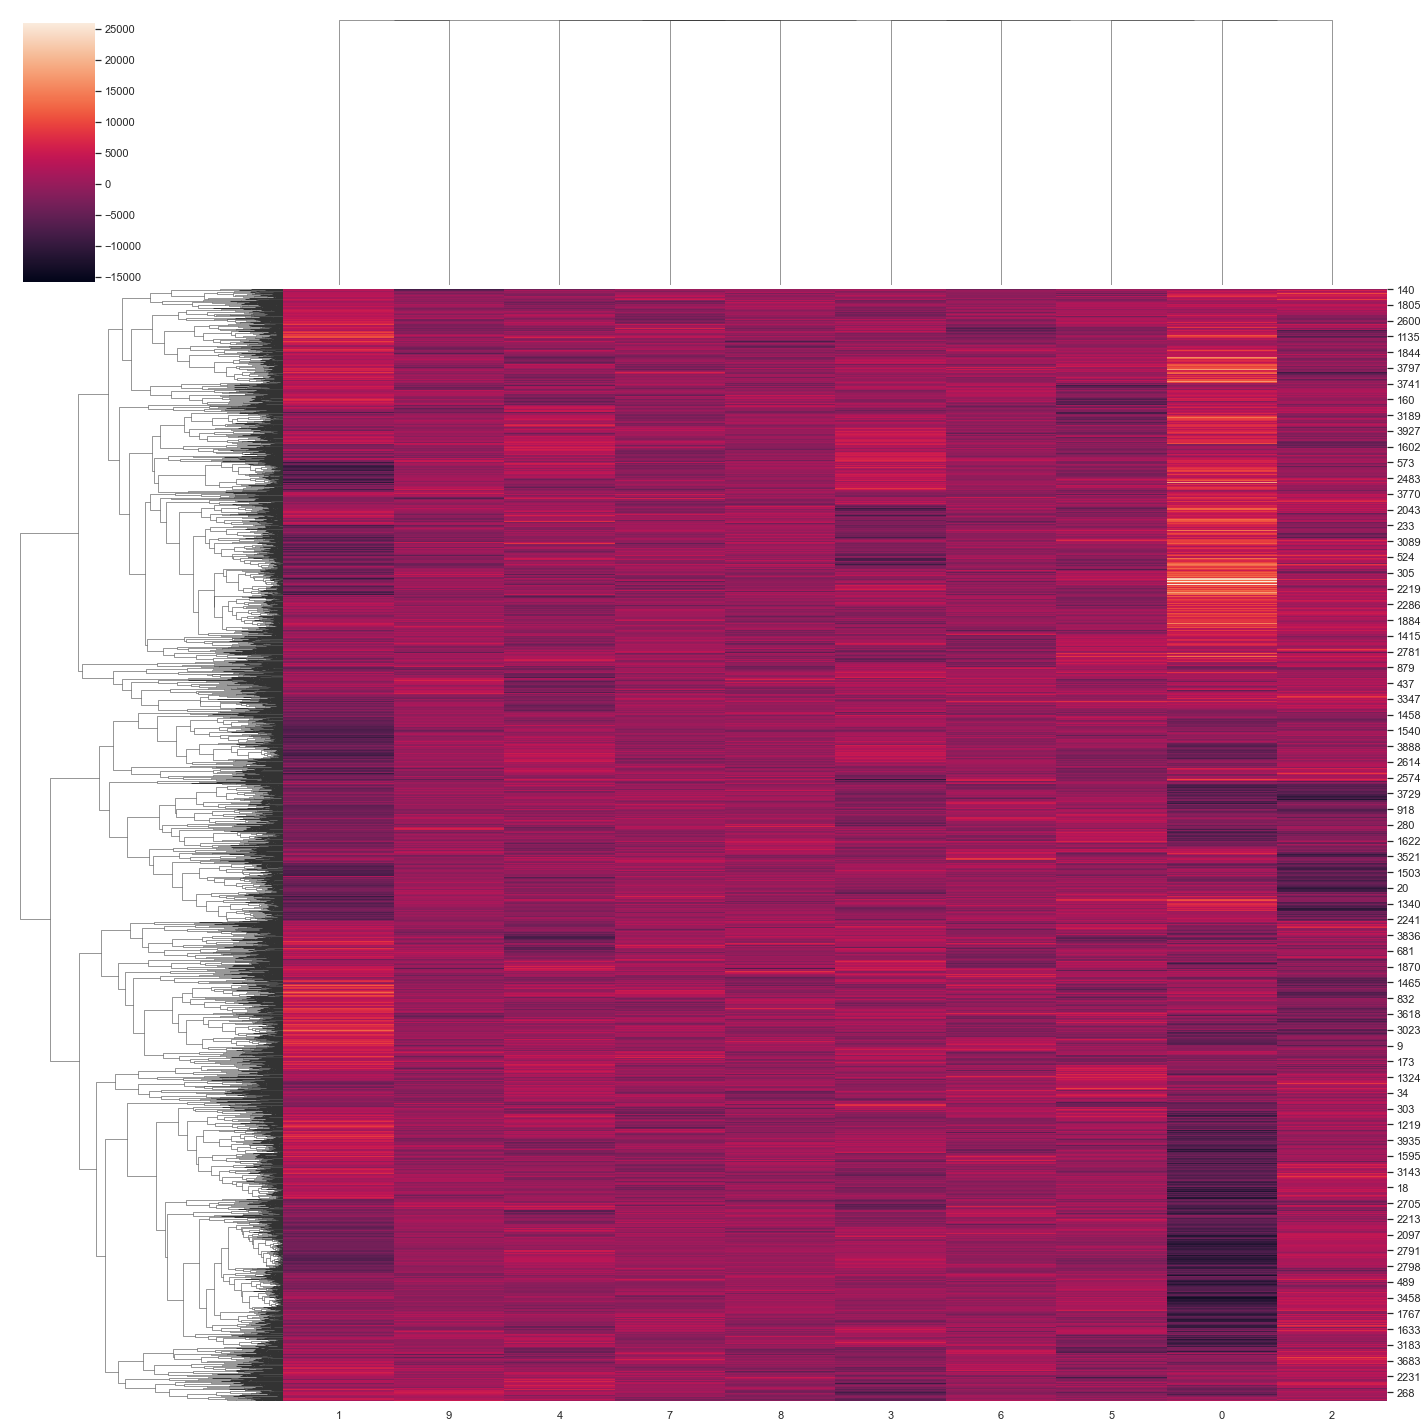

In [118]:
g = sns.clustermap(pca_result[:,:10], metric="correlation", figsize=(20,20))

In [119]:
g = sns.clustermap(pca_result[:,:10],method="single", figsize=(20,20))

In [ ]:
g = sns.clustermap((pca_result[:,:10], z_score=0, cmap="vlag",figsize=(20,20))